# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [27]:
import plotly.express as px
from plotly import graph_objects
from IPython.display import FileLink, display
import yfinance as yf
import pandas as pd
import numpy as np

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [8]:
%%time

asset = ['AAPL', 'META', 'NVDA']
date_time = '2023-07-30'

asset_finance = yf.download(asset, start=date_time).reset_index()

asset_finance.head()

<timed exec>:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  3 of 3 completed

CPU times: total: 188 ms
Wall time: 1.3 s


Price        Date       Close                               High              \
Ticker                   AAPL        META       NVDA        AAPL        META   
0      2023-07-31  194.502594  316.861725  46.700256  194.542206  323.883203   
1      2023-08-01  193.670944  320.949219  46.478397  194.779837  322.371439   
2      2023-08-02  190.670944  312.595093  44.241776  193.245161  316.652849   
3      2023-08-03  189.274918  311.481171  44.487621  190.463019  314.226121   
4      2023-08-04  180.185928  309.034637  44.652523  185.522496  316.672727   

Price                     Low                               Open              \
Ticker       NVDA        AAPL        META       NVDA        AAPL        META   
0       47.101011  193.324388  315.857226  46.477394  194.116461  321.923950   
1       46.871157  193.344214  312.943153  45.998693  194.294704  315.807444   
2       45.811808  189.948185  308.955058  43.360318  193.106550  316.264962   
3       45.090251  188.799680  308.238948  43.773061  189.670961  308.238948   
4       45.613929  180.116615  308.507530  44.365701  183.680934  313.241539   

Price                 Volume                       
Ticker       NVDA       AAPL      META       NVDA  
0       46.725242   38824100  25799600  251055000  
1       46.431425   35175100  22817900  237858000  
2       45.802815   50389300  20461100  530142000  
3       43.773061   61235200  15180200  324176000  
4       44.957336  115956800  17612800  362666000

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [10]:
amplitude = asset_finance['High'] - asset_finance['Low']
amplitude['Date'] = asset_finance['Date']
ampli = amplitude.reset_index()

ampli.head()

Ticker,index,AAPL,META,NVDA,Date
0,0,1.217818,8.025977,0.623617,2023-07-31
1,1,1.435623,9.428286,0.872464,2023-08-01
2,2,3.296976,7.697790,2.451491,2023-08-02
3,3,1.663339,5.987173,1.317190,2023-08-03
4,4,5.405881,8.165197,1.248229,2023-08-04


In [11]:
df_to_melt = amplitude[['Date', 'META', 'AAPL', 'NVDA']]

df_long = df_to_melt.melt(
    id_vars='Date',         
    var_name='Company',       
    value_name='Amplitude'   
)

C:\Users\Meu Computador\anaconda3\EBAC\M 22 - Gráficos Interativos\amplitude_por_ativo.jpg

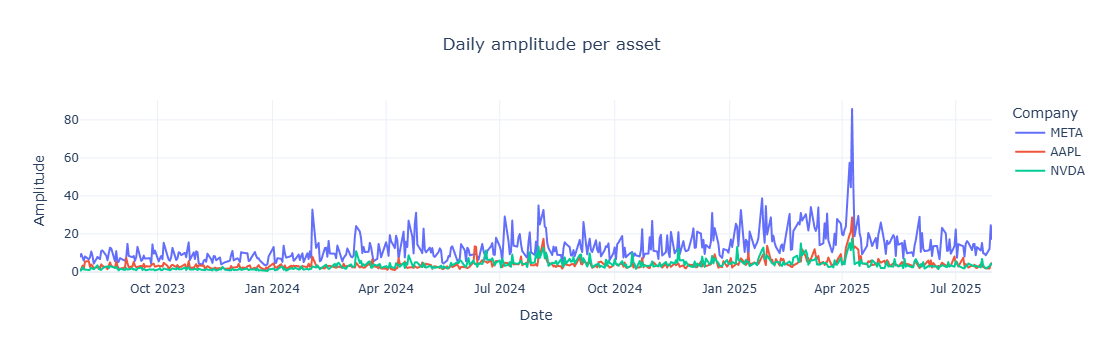

In [45]:
fig = px.line(
    df_long,
    x='Date',
    y='Amplitude',
    color='Company',
    template='plotly_white',
    title='Daily amplitude per asset'
)

fig.update_layout(
    title={
        'text': 'Daily amplitude per asset',
        'x': 0.5,              
        'xanchor': 'center'    
    }
)

fig.write_image("amplitude_por_ativo.jpg")
display(FileLink('amplitude_por_ativo.jpg', result_html_prefix="📥 Click here to download: "))

fig.show()

In [16]:
std_company = (df_long.groupby('Company')['Amplitude']
               .std()
               .sort_values(ascending=False))

mean_company = (df_long.groupby('Company')['Amplitude']
                .mean()
                .sort_values(ascending=False))

print('Standard deviation per asset:')
print(std_company)

print('\nAverage amplitude per asset:')
print(mean_company)

Standard deviation per asset:
Company
META    7.727094
AAPL    2.576445
NVDA    2.508938
Name: Amplitude, dtype: float64

Average amplitude per asset:
Company
META    13.262538
AAPL     3.990435
NVDA     3.791251
Name: Amplitude, dtype: float64


# Insight

**META** shares showed the highest volatility in the period analyzed, with *standard* and *average* deviations significantly higher than other assets.

This indicates that their prices fluctuated more intensely over the days, which may represent greater risk — and also greater potential return.

# Archives to CSV

In [43]:
std_company.to_csv('standard_deviation.csv', index=False)
mean_company.to_csv('average_deviation.csv', index=False)

display(FileLink('standard_deviation.csv', result_html_prefix="📥 Click here to download: "))
display(FileLink('average_deviation.csv', result_html_prefix="📥 Click here to download: "))

C:\Users\Meu Computador\anaconda3\EBAC\M 22 - Gráficos Interativos\standard_deviation.csv

C:\Users\Meu Computador\anaconda3\EBAC\M 22 - Gráficos Interativos\average_deviation.csv